Documentation : https://docs.ultralytics.com/yolov5/
Git : https://github.com/ultralytics/yolov5

In [ ]:
!pip install yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import torch
# Torch is an open-source deep learning library known for its efficient tensor computations
# and automatic differentiation capabilities.
# It provides tools for building and training neural networks, making it widely used in the field of deep learning.

from PIL import Image
from yolov5.models.experimental import attempt_load
from yolov5.utils.general import non_max_suppression
import matplotlib.pyplot as plt
import numpy as np

# Load model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom


def extract_face(filename, required_size=(224, 224)):
    # Load image
    img = Image.open(filename)

    # Convert image to RGB (if it's RGBA, for example)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize image to the desired size
    img = img.resize(required_size)

    # Convert image to tensor
    img_tensor = torch.from_numpy(np.array(img)).permute(2, 0, 1).float().unsqueeze(0) / 255.0

    # Inference
    results = model(img_tensor)

    # Apply non-maximum suppression to get the most confident face detection
    results = non_max_suppression(results, conf_thres=0.5, iou_thres=0.5)
#     Non max suppression is a technique used mainly in object
#     detection that aims at selecting the best bounding box out of a set of overlapping boxes.

    # Extract bounding box coordinates
    x1, y1, x2, y2 = results[0][0][:4].tolist()

    # Extract the face
    face = img.crop((x1, y1, x2, y2))

    # Convert face to numpy array
    face_array = np.array(face)

    return face_array


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-11 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


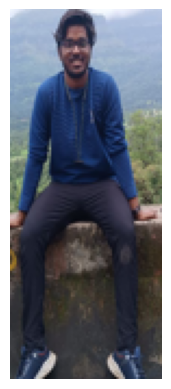

In [ ]:
# Load the photo and extract the face
from matplotlib import pyplot as plt
%matplotlib inline
pixels = extract_face('/peus1.jpg')

# Display the image
plt.imshow(pixels)
plt.axis('off')
plt.show()

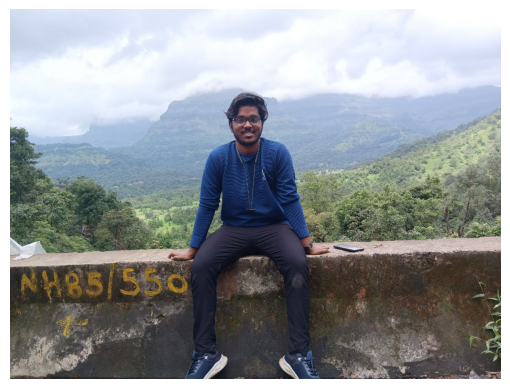

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
image = Image.open('/peus1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()